# Introduction to geospatial vector data in Python

In [1]:
%matplotlib inline

import pandas as pd
import geopandas

pd.options.display.max_rows = 10

In [2]:
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona

## Convert type of geospatial data file 

In [3]:

# df = pd.read_excel('Agricultural structure data 2016.xlsx')
# df.head()
# geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
# crs = {'init': 'epsg:2263'} #http://www.spatialreference.org/ref/epsg/2263/
# geo_df = GeoDataFrame(df, crs=crs, geometry='Co-Ordinates')

# geo_df.to_file(driver='ESRI Shapefile', filename='Landkreis latitude longitude.shp')

# https://gis.stackexchange.com/questions/204201/geopandas-to-file-saves-geodataframe-without-coordinate-system
# http://geopandas.org/io.html#writing-spatial-data
# https://gis.stackexchange.com/questions/174159/convert-a-pandas-dataframe-to-a-geodataframe

## Importing geospatial data

Geospatial data is often available from specific GIS file formats or data stores, like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) database, ...

We can use the GeoPandas library to read many of those GIS file formats (relying on the `fiona` library under the hood, which is an interface to GDAL/OGR), using the `geopandas.read_file` function.

For example, let's start by reading a shapefile with all the countries of the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/, zip file is available in the `/data` directory), and inspect the data:

In [5]:
point_landkreise = geopandas.read_file("geodata\\Landkreis latitude longitude.shp")
Germany = geopandas.read_file("zip://./geodata/vg2500_geo84.zip")
landkreise = geopandas.read_file("zip://./geodata/landkreise-in-germany.zip")
# landkreise.to_excel("landkreise-in-germany.xlsx")
landkreise

,id_0,iso,name_0,id_1,name_1,id_2,name_2,hasc_2,ccn_2,cca_2,type_2,engtype_2,nl_name_2,varname_2,geometry
0,86.0,DEU,Germany,12.0,Saarland,335.0,Regionalverband SaarbrÃ¼cken,DE.SL.SB,0.0,10041,Landkreis,District,None,None,"POLYGON ((6.944277763366697 49.37766647338866,..."
1,86.0,DEU,Germany,2.0,Bayern,103.0,Memmingen,DE.BY.MM,0.0,09764,Kreisfreie Stadt,District,None,None,"POLYGON ((10.20821666717535 47.98096847534184,..."
2,86.0,DEU,Germany,2.0,Bayern,78.0,FÃ¼rth,DE.BY.FL,0.0,09573,Landkreis,District,None,None,"POLYGON ((10.90453910827631 49.5490341186525, ..."
3,86.0,DEU,Germany,11.0,Rheinland-Pfalz,321.0,Rhein-HunsrÃ¼ck-Kreis,DE.RP.RH,0.0,07140,Landkreis,District,None,None,"POLYGON ((7.5543413162232 50.25704956054686, 7..."
4,86.0,DEU,Germany,2.0,Bayern,66.0,Dachau,DE.BY.DC,0.0,09174,Landkreis,District,None,None,"POLYGON ((11.35806655883783 48.44985961914085,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,86.0,DEU,Germany,13.0,Sachsen-Anhalt,343.0,Dessau-RoÃlau,DE.ST.DR,0.0,15001,Kreisfreie Stadt,District,None,None,(POLYGON ((12.19431209564203 51.76648330688481...
399,86.0,DEU,Germany,9.0,Niedersachsen,204.0,Delmenhorst,DE.NI.DL,0.0,03401,Kreisfreie Stadt,District,None,None,"POLYGON ((8.657160758972223 53.00899505615239,..."
400,86.0,DEU,Germany,10.0,Nordrhein-Westfalen,249.0,Coesfeld,DE.NW.CE,0.0,05558,Kreis,District,None,None,"POLYGON ((7.289428234100454 52.06087875366204,..."
401,86.0,DEU,Germany,2.0,Bayern,114.0,OstallgÃ¤u,DE.BY.OT,0.0,09777,Landkreis,District,None,None,"POLYGON ((10.74388408660888 48.11145019531266,..."


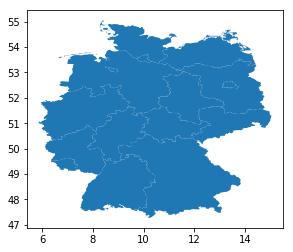

In [6]:
Germany.plot()

In [7]:
point_landkreise.head()
Germany.head()

,USE,RS,RS_ALT,GEN,SHAPE_LENG,SHAPE_AREA,geometry
0,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,(POLYGON ((10.19113690277905 53.72299476403796...
1,2,03,030000000000,Niedersachsen,2.016496e+06,4.771641e+10,(POLYGON ((8.689616610395177 53.87999272032229...
2,2,04,040000000000,Bremen,1.549716e+05,4.054809e+08,"(POLYGON ((8.52975665105563 53.21639650603829,..."
3,2,05,050000000000,Nordrhein-Westfalen,1.352108e+06,3.404727e+10,"POLYGON ((8.666728266554577 52.52148958107465,..."
4,2,06,060000000000,Hessen,1.105093e+06,2.109232e+10,"POLYGON ((9.505598958397917 51.62776574465611,..."


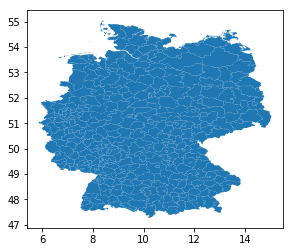

In [8]:
landkreise.plot()

In [9]:
point_landkreise.geometry

0      POINT (12.0991466 54.0924406)
1         POINT (7.11977 50.5418199)
2      POINT (11.0473572 48.3830397)
3       POINT (9.9196653 48.4148539)
4      POINT (12.3829246 50.9832693)
                   ...              
398     POINT (9.9533548 49.7913044)
399     POINT (7.3634022 49.2450528)
400     POINT (6.2451862 50.7410859)
401                  POINT (nan nan)
402                  POINT (nan nan)
Name: geometry, dtype: object

<div class="alert alert-info" style="font-size:120%">
<b>REMEMBER</b>: <br>

<ul>
  <li>A `GeoDataFrame` allows to perform typical tabular data analysis together with spatial operations</li>
  <li>A `GeoDataFrame` (or *Feature Collection*) consists of:
   <ul>
    <li>**Geometries** or **features**: the spatial objects</li>
    <li>**Attributes** or **properties**: columns with information about each spatial object</li>
   </ul>
  </li>
</ul>
</div>

<div class="alert alert-info" style="font-size:120%">
<b>REMEMBER</b>: <br><br>

Single geometries are represented by `shapely` objects:

<ul>
  <li>If you access a single geometry of a GeoDataFrame, you get a shapely geometry object</li>
  <li>Those objects have similar functionality as geopandas objects (GeoDataFrame/GeoSeries). For example:
   <ul>
    <li>`single_shapely_object.distance(other_point)` -> distance between two points</li>
    <li>`geodataframe.distance(other_point)` ->  distance for each point in the geodataframe to the other point</li>
   </ul>
  </li>
</ul>
</div>

In [10]:
landkreise_feature = landkreise.columns
useless_feature = landkreise_feature.drop(['geometry', 'id_2'])
useless_feature

Index(['id_0', 'iso', 'name_0', 'id_1', 'name_1', 'name_2', 'hasc_2', 'ccn_2',
       'cca_2', 'type_2', 'engtype_2', 'nl_name_2', 'varname_2'],
      dtype='object')

In [11]:
landkreise.drop(useless_feature, axis=1, inplace=True)
landkreise.rename(columns={'id_2':'ID'}, inplace=True)
landkreise

,ID,geometry
0,335.0,"POLYGON ((6.944277763366697 49.37766647338866,..."
1,103.0,"POLYGON ((10.20821666717535 47.98096847534184,..."
2,78.0,"POLYGON ((10.90453910827631 49.5490341186525, ..."
3,321.0,"POLYGON ((7.5543413162232 50.25704956054686, 7..."
4,66.0,"POLYGON ((11.35806655883783 48.44985961914085,..."
...,...,...
398,343.0,(POLYGON ((12.19431209564203 51.76648330688481...
399,204.0,"POLYGON ((8.657160758972223 53.00899505615239,..."
400,249.0,"POLYGON ((7.289428234100454 52.06087875366204,..."
401,114.0,"POLYGON ((10.74388408660888 48.11145019531266,..."


In [12]:
df_temp = pd.read_excel('preprocessing_landkreisGeometry.xlsx')
df_temp

,Landkreis,ID,LKR-ID
0,LK Alb-Donau-Kreis,1,8425
1,LK Böblingen,2,8115
2,SK Baden-Baden,3,8211
3,LK Biberach,4,8426
4,LK Bodenseekreis,5,8435
...,...,...,...
396,SK Suhl,399,16054
397,LK Unstrut-Hainich-Kreis,400,16064
398,LK Wartburgkreis,401,16063
399,LK Weimarer Land,402,16071


In [13]:
landkreisenGeometry = pd.merge(landkreise, df_temp, on="ID", how='inner')
# landkreisenGeometry.drop(labels='ID', axis=1, inplace=True)
landkreisenGeometry

,ID,geometry,Landkreis,LKR-ID
0,335.0,"POLYGON ((6.944277763366697 49.37766647338866,...",Regionalverband Saarbrücken,10041
1,103.0,"POLYGON ((10.20821666717535 47.98096847534184,...",SK Memmingen,9764
2,78.0,"POLYGON ((10.90453910827631 49.5490341186525, ...",LK Fürth,9573
3,321.0,"POLYGON ((7.5543413162232 50.25704956054686, 7...",LK Rhein-Hunsrück-Kreis,7140
4,66.0,"POLYGON ((11.35806655883783 48.44985961914085,...",LK Dachau,9174
...,...,...,...,...
396,343.0,(POLYGON ((12.19431209564203 51.76648330688481...,SK Dessau-Roßlau,15001
397,204.0,"POLYGON ((8.657160758972223 53.00899505615239,...",SK Delmenhorst,3401
398,249.0,"POLYGON ((7.289428234100454 52.06087875366204,...",LK Coesfeld,5558
399,114.0,"POLYGON ((10.74388408660888 48.11145019531266,...",LK Ostallgäu,9777


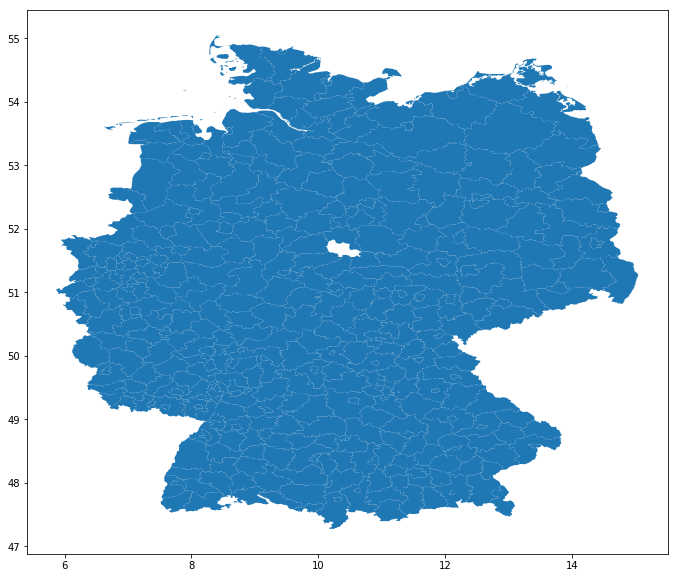

In [14]:
landkreisenGeometry.plot(figsize=(15, 10))

In [19]:
df_temp = pd.read_excel('All_Data_AllTractors.xlsx')
landkreisenGeometry.rename(columns={'LKR-ID':'LandKreis ID'}, inplace=True)
df_all = pd.merge(landkreisenGeometry, df_temp, on="LandKreis ID", how='right')
df_all = df_all.drop('ID', axis=1)
df_all = df_all.drop('Landkreis', axis=1)
# df_all.to_excel('df_all_geometry.xlsx')
df_all

,geometry,LandKreis ID,Year,Company,1-100,101-200,201-300,301-400,401-500,Fläche [ha],...,Betriebe Öko-LF in Umst.,LF ökologisch [ha],LW-Fläche unter 5 ha,LW-Fläche 10-20 ha,LW-Fläche 20-50 ha,LW-Fläche 50-100 ha,LW-Fläche 100-200 ha,LW-Fläche über 200 ha,Number of machinery,Number of Tractors
0,"POLYGON ((6.944277763366697 49.37766647338866,...",10041,2018,3,8,1,0,0,0,39883.7017,...,0,530,16,521,793,897,1876,2334,1,218
1,"POLYGON ((6.944277763366697 49.37766647338866,...",10041,2018,4,8,1,0,0,0,39883.7017,...,0,530,16,521,793,897,1876,2334,1,218
2,"POLYGON ((10.20821666717535 47.98096847534184,...",9764,2017,2,6,4,0,0,0,6790.4776,...,0,0,0,466,965,937,0,0,9,109
3,"POLYGON ((10.20821666717535 47.98096847534184,...",9764,2018,2,1,5,0,0,0,6790.4776,...,0,0,0,466,965,937,0,0,7,109
4,"POLYGON ((10.90453910827631 49.5490341186525, ...",9573,2017,3,46,3,1,0,0,29832.1150,...,105,437,15,1710,4015,7426,2571,0,1,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,"POLYGON ((10.74388408660888 48.11145019531266,...",9777,2018,4,123,121,28,24,0,135435.4183,...,1946,13161,123,11930,31459,23826,4438,1319,1,3139
1589,(POLYGON ((11.60663509368907 48.08669281005858...,9162,2017,1,112,6,3,2,0,30244.4618,...,0,1664,0,330,962,1953,1269,0,3,1498
1590,(POLYGON ((11.60663509368907 48.08669281005858...,9162,2017,3,112,6,3,2,0,30244.4618,...,0,1664,0,330,962,1953,1269,0,1,1498
1591,(POLYGON ((11.60663509368907 48.08669281005858...,9162,2018,1,122,75,3,1,1,30244.4618,...,0,1664,0,330,962,1953,1269,0,4,1498


In [24]:
df_all['LandKreis ID'].unique().shape

(321,)

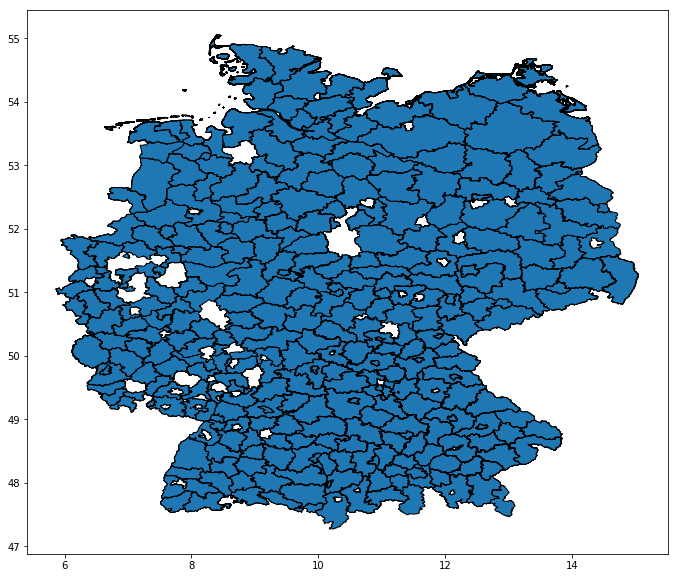

In [39]:
df_all.plot(figsize=(15, 10), edgecolor='black')

## Plotting our different layers together and contain center point inside polygon

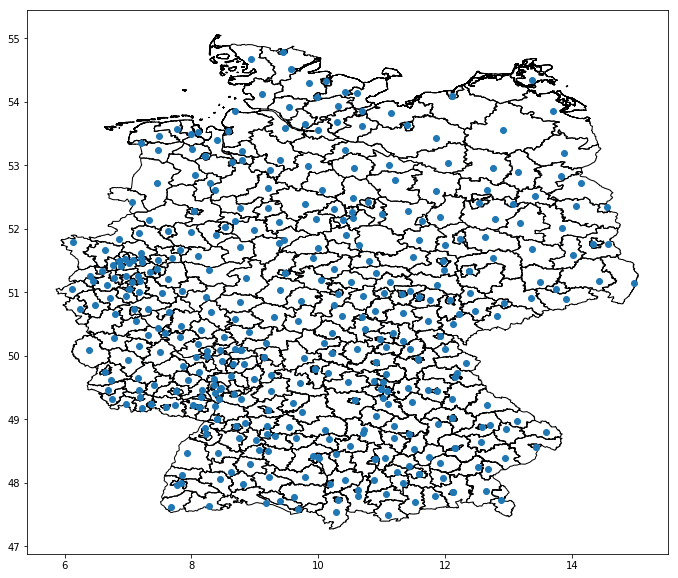

In [25]:
ax = landkreise.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
point_landkreise.plot(ax=ax)
# cities.plot(ax=ax, color='red')
# ax.set(xlim=(-20, 60), ylim=(-40, 40))

In [26]:
point_landkreise

,City,Latitude,Longitude,geometry
0,Rostock,54.092441,12.099147,POINT (12.0991466 54.0924406)
1,Ahrweiler,50.541820,7.119770,POINT (7.11977 50.5418199)
2,Aichach-Friedberg,48.383040,11.047357,POINT (11.0473572 48.3830397)
3,Alb-Donau-Kreis,48.414854,9.919665,POINT (9.9196653 48.4148539)
4,Altenburger Land,50.983269,12.382925,POINT (12.3829246 50.9832693)
...,...,...,...,...
398,Würzburg,49.791304,9.953355,POINT (9.9533548 49.7913044)
399,Zweibrücken,49.245053,7.363402,POINT (7.3634022 49.2450528)
400,Städteregion Aachen,50.741086,6.245186,POINT (6.2451862 50.7410859)
401,None,NaN,NaN,POINT (nan nan)


D:\anaconda\Setup\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')
D:\anaconda\Setup\lib\site-packages\numpy\lib\function_base.py:2652: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


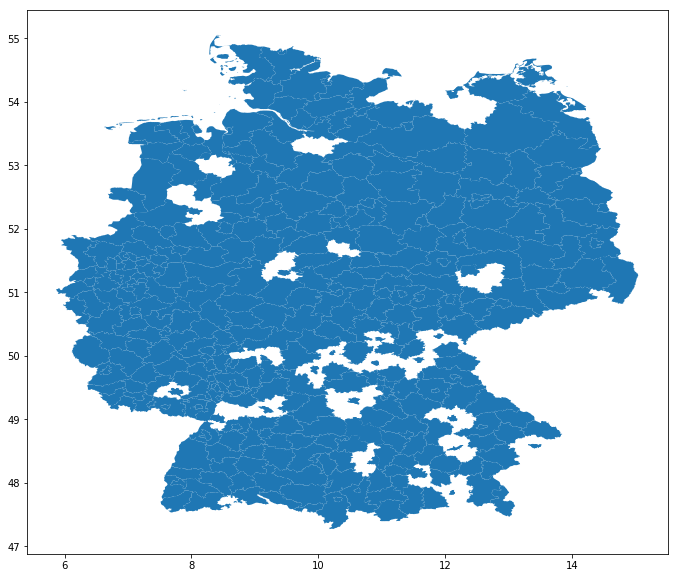

In [27]:
merge_landkreise = geopandas.sjoin(landkreise, point_landkreise, how="inner", op='intersects')
merge_landkreise.plot(figsize=(15, 10))

In [29]:
import pandas as pd
import geopandas as gpd
import libpysal as lp
import matplotlib.pyplot as plt
import rasterio as rio
import numpy as np
# import contextily as ctx
import shapely.geometry as geom
%matplotlib inline

In [88]:
year = 2018
company = 1
df = df_all[(df_all['Year'] == year) &
                 (df_all['Company'] == company)]

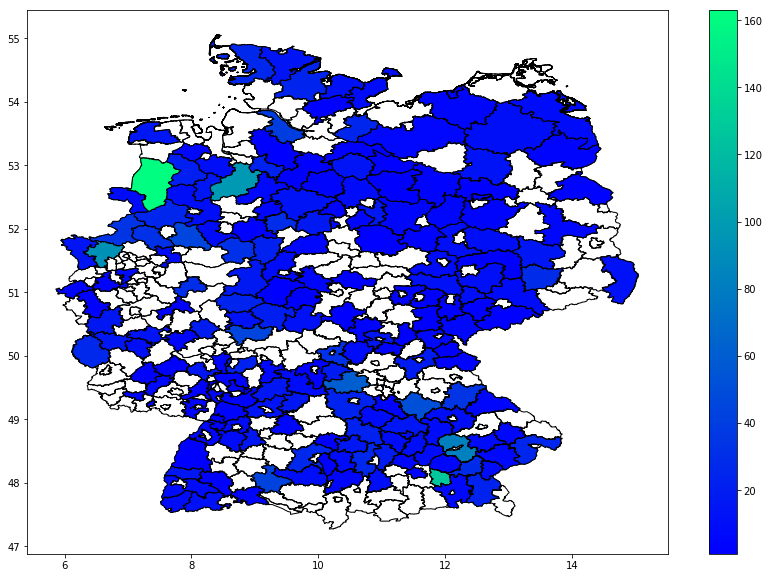

In [89]:
# fig, ax = plt.subplots(figsize=(12,10), subplot_kw=dict(aspect='equal'))
ax = landkreise.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
# df_all.plot(column='Number of machinery', scheme='Quantiles', 
#         k=10, cmap='winter', legend=True, ax=ax)
plot = df.plot(column='Number of machinery', cmap='winter', edgecolor='black', legend=True, ax=ax)  
figure = plot.get_figure()
figure.savefig(str(year) + "_C" + str(company) + "_Map_Alltractors.png")
plot

## Spatial Autocorrelation ##

Visual inspection of the map pattern for the prices allows us to search for
spatial structure. If the spatial distribution of the prices was random, then we
should not see any clustering of similar values on the map. However, our visual
system is drawn to the darker clusters in the south west as well as the center,
and a concentration of the lighter hues (lower prices) in the north central and
south east.

Our brains are very powerful pattern recognition machines. However, sometimes
they can be too powerful and lead us to detect false positives, or patterns
where there are no statistical patterns. This is a particular concern when
dealing with visualization of irregular polygons of differning sizes and shapes.

The concept of *spatial
autocorrelation* relates to the combination of two types of similarity: spatial
similarity and attribute similarity. Although there are many different measures
of spatial autocorrelation, they all combine these two types of simmilarity into
a summary measure.

Let's use PySAL to generate these two types of similarity
measures.

### Spatial Similarity ###

We have already encountered spatial weights
in a previous notebook. In spatial autocorrelation analysis, the spatial weights
are used to formalize the notion of spatial similarity. As we have seen there
are many ways to define spatial weights, here we will use queen contiguity:

In [ ]:
wq =  lp.weights.Queen.from_dataframe(df_all)
wq.transform = 'r'

### Attribute Similarity ###

So the spatial weight between districts $i$ and $j$ indicates if the two 
are neighbors (i.e., geographically similar). What we also need is a measure of
attribute similarity to pair up with this concept of spatial similarity. The
**spatial lag** is a derived variable that accomplishes this for us. For district
$i$ the spatial lag is defined as: $$y_i = \sum_j w_{i,j} y_j$$

In [ ]:
y = df_all['Number of machinery']
ylag = lp.weights.lag_spatial(wq, y)

In [ ]:
ylag

In [ ]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)

In [ ]:
f,ax = plt.subplots(1, figsize=(9, 9), subplot_kw=dict(aspect='equal'))
df_all.assign(cl=ylagq5.yb).plot(column='cl', categorical=True,
        k=5, cmap='Blues', linewidth=0.1,
        edgecolor='k', legend=True, ax=ax) # edgecolor='white'
ax.set_axis_off()
plt.title("Spatial Lag Number of machinery (Quintiles)")

plt.show()

In [ ]:
df_all['lag Number of machinery'] = ylag
f,ax = plt.subplots(1,2,figsize=(4.16*4,10), subplot_kw=dict(aspect='equal'))

df_all.plot(column='Number of machinery', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='Blues')
ax[0].axis(df_all.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Number of machinery")

df_all.plot(column='lag Number of machinery', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='Blues', k=5)
ax[1].axis(df_all.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag Number of machinery")

ax[0].axis('off')
ax[1].axis('off')
plt.show()

### Join counts ###

One way to formalize a test for spatial autocorrelation in a binary attribute is
to consider the so-called _joins_. A join exists for each neighbor pair of
observations, and the joins are reflected in our binary spatial weights object
`wq`. 

Each unit can take on one of two values "Black" or "White", and so for a given
pair of neighboring locations there are three different types of joins that can
arise:

- Black Black (BB)
- White White (WW)
- Black White (or White Black) (BW)

Given that we have 68 Black polygons on our map, what is the number of Black
Black (BB) joins we could expect if the process were such that the Black
polygons were randomly assigned on the map? This is the logic of join count statistics.

We can use the `esda` package from PySAL to carry out join count analysis:

In [ ]:
y.median()

yb = y > y.median()
sum(yb)

# We have 68 districts with nightly Airbnb prices above the median and 70 below the
# median (recall the issue with ties).

yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb] 
df_all['yb'] = yb

# The spatial distribution of the binary variable immediately raises questions
# about the juxtaposition of the "black" and "white" areas.

fig = plt.figure(figsize=(12,10))
ax = plt.gca()
df_all.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

In [ ]:
import esda 
yb = 1 * (y > y.median()) # convert back to binary
wq =  lp.weights.Queen.from_dataframe(df_all)
wq.transform = 'b'
np.random.seed(12345)
jc = esda.join_counts.Join_Counts(yb, wq)

# The resulting object stores the observed counts for the different types of joins:

jc.bb

jc.ww

jc.bw

# Note that the three cases exhaust all possibilities:

jc.bb + jc.ww + jc.bw

# and

wq.s0 / 2

# which is the unique number of joins in the spatial weights object.

# Our object tells us we have observed 121 BB joins:

jc.bb

# The critical question for us, is whether this is a departure from what we would
# expect if the process generating the spatial distribution of the Black polygons
# were a completely random one? To answer this, PySAL uses random spatial
# permutations of the observed attribute values to generate a realization under
# the null of _complete spatial randomness_ (CSR). This is repeated a large number
# of times (999 default) to construct a reference distribution to evaluate the
# statistical significance of our observed counts.

# The average number of BB joins from the synthetic realizations is:

jc.mean_bb

# which is less than our observed count. The question is whether our observed
# value is so different from the expectation that we would reject the null of CSR?

import seaborn as sbn
sbn.kdeplot(jc.sim_bb, shade=True)
plt.vlines(jc.bb, 0, 1, color='r')
plt.vlines(jc.mean_bb, 0,1)
plt.xlabel('BB Counts')

# The density portrays the distribution of the BB counts, with the black vertical
# line indicating the mean BB count from the synthetic realizations and the red
# line the observed BB count for our prices. Clearly our observed value is
# extremely high. A pseudo p-value summarizes this:

print(jc.p_sim_bb)
     
# Since this is below conventional significance levels, we would reject the null
# of complete spatial randomness in favor of spatial autocorrelation in market prices.




### Continuous Case

The join count analysis is based on a binary attribute, which can cover many
interesting empirical applications where one is interested in presence and
absence type phenomena. In our case, we artificially created the binary variable,
and in the process we throw away a lot of information in our originally
continuous attribute. Turning back to the original variable, we can explore
other tests for spatial autocorrelation for the continuous case.

First, we transform our weights to be row-standardized, from the current binary state:

In [ ]:
wq.transform = 'r'
# y = df_all['Number of machinery']

In [ ]:
categorical_features = df_all.select_dtypes(include = ["object"]).columns
numerical_features = df_all.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
df_num = df_all[numerical_features]
df_cat = df_all[categorical_features]
df_num.drop(columns=['LKR-ID'], inplace=True) # LKR-ID is just a classification number
df_num.drop(columns=['lag Number of machinery'], inplace=True)

In [ ]:
import seaborn as sbn

In [ ]:
for name in df_num.columns:
    y = df_num[name]
    np.random.seed(12345)
    mi = esda.moran.Moran(y, wq)
    mi.I
    print(name)
    print(mi.p_sim)